# K Means

---
* [Theory and Algorithm](../theory/k_means.ipynb)
* [Implementation in Python](../pymlalgo/clustering/k_means.py)

---

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Tell python to look for modules in the current project directory

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

The demo uses the [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)  
$k$-means will try to cluster the three species into three groups.

In [4]:
from sklearn.datasets import load_iris

iris_data = load_iris()
x = iris_data['data']
labels = iris_data['target']
label_names = iris_data['target_names']
pd.DataFrame({'sepcies': label_names})

,sepcies
0,setosa
1,versicolor
2,virginica


Convert data to 2D using [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for plotting

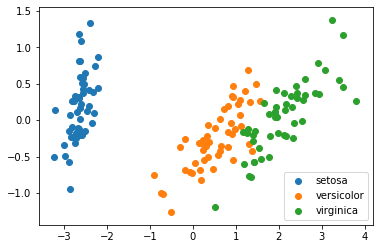

In [5]:
from sklearn.decomposition import PCA

x_2d = PCA(n_components=2).fit_transform(x)

for label in np.unique(labels):
    plt.scatter(x_2d[labels == label, 0], x_2d[labels == label, 1], label=label_names[label])
plt.legend();

**Use $k$-means to cluster the data**

In [6]:
from pymlalgo.clustering.k_means import KMeans

k_means_model = KMeans(x, 3)
k_means_model.train()

Since $k$-means is an unsuperivsed learning, the algorithm doesn't give target names for each cluster. However, by manually looking at the data and comparing with the original labels, we can infer that after clustering, 0 is verscicolor, 1 is  virginica and 2 is setosa. Let's convert it to original labels to make plots consistent.

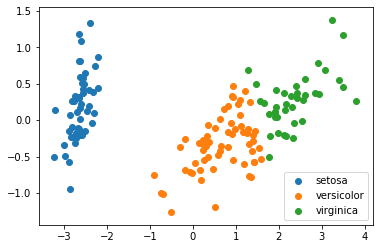

In [7]:
k_means_labels = np.copy(k_means_model.labels)
k_means_labels = np.where(k_means_labels == 0, 1, np.where(k_means_labels == 1, 2, 0))

for label in np.unique(k_means_labels).astype('int'):
    plt.scatter(x_2d[k_means_labels == label, 0], x_2d[k_means_labels == label, 1], label=label_names[label])
plt.legend();

**Comparision with `sklearn`**

In [8]:
import sklearn.cluster as skc

sk_model = skc.KMeans(n_clusters=3, random_state=7)
sk_model = sk_model.fit(x)

Again looking manually, we can see that for sklearn k means algorithm, the labels remain as it is.

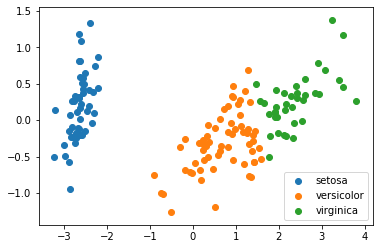

In [9]:
sk_labels = np.copy(sk_model.labels_)

for label in np.unique(k_means_labels).astype('int'):
    plt.scatter(x_2d[sk_labels == label, 0], x_2d[sk_labels == label, 1], label=label_names[label])
plt.legend();

In [10]:
accuracy = np.mean(labels == k_means_labels)
accuracy_sk = np.mean(labels == sk_labels)
pd.DataFrame({'accuracy': [accuracy], 'accuracy_sk': [accuracy_sk]})

,accuracy,accuracy_sk
0,0.886667,0.893333


In [11]:
cost = k_means_model.compute_cost(k_means_model.mu, k_means_model.labels)
cost_sk = sk_model.inertia_

pd.DataFrame({'cost': [cost], 'cost_sk': [cost_sk]})

,cost,cost_sk
0,78.855666,78.851441


$\dagger$ sklearn also uses the k-means++ initialization. The cost is lower in case of sklearn because by default it runs the algorithm `n_init=10` times and chooses a different first centroid. It then reports the results from the set which has minimum cost.